In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
##drop uncessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

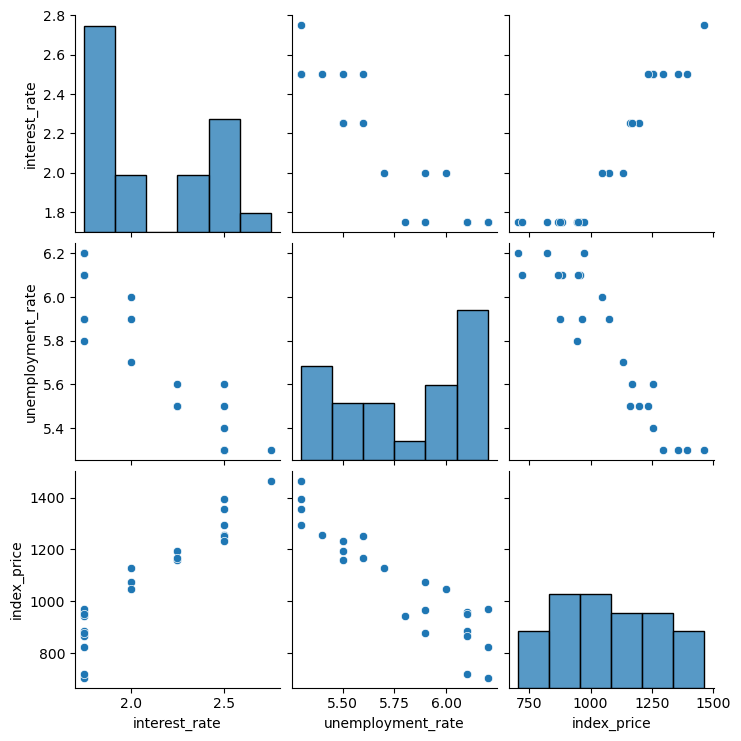

In [8]:
##lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

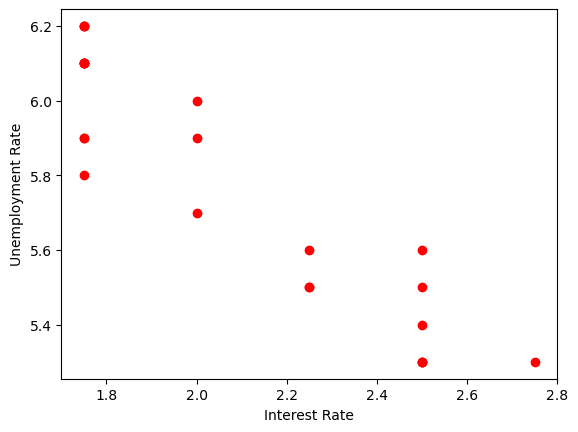

In [14]:
##visualize the datapoints more clearly
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [16]:
##independent and dependent feautres
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [17]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

<Axes: xlabel='interest_rate', ylabel='index_price'>

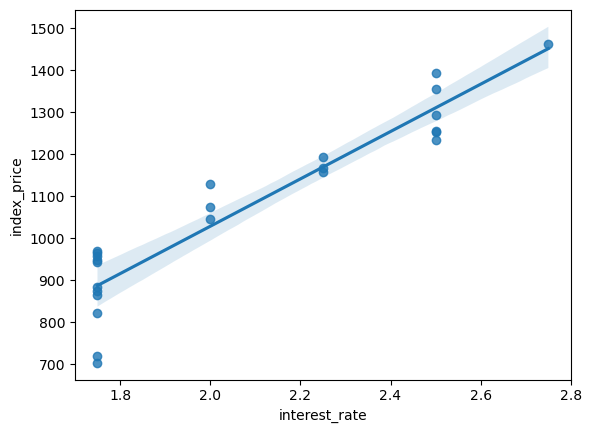

In [22]:
import seaborn as sns
sns.regplot(
    x=df_index['interest_rate'],
    y=df_index['index_price']
)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [28]:
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_Score=cross_val_score(reg,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [30]:
np.mean(validation_Score)

np.float64(-7079.4669835292325)

In [31]:
y_pred=reg.predict(X_test)

In [32]:
##perfromance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3964.1919059052175
51.718607749640945
62.96182895934026


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.9097864950449024


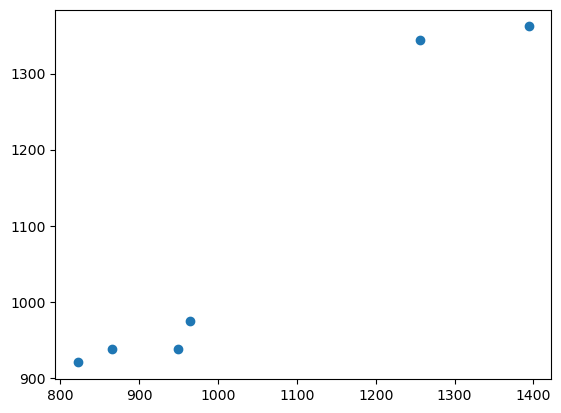

In [35]:
##assumptions
plt.scatter(y_test,y_pred)

In [36]:
residuals=y_test-y_pred
print(residuals)

13    -9.321272
17    10.844177
19   -72.155823
4    -87.938962
1     31.978313
21   -98.073099
Name: index_price, dtype: float64


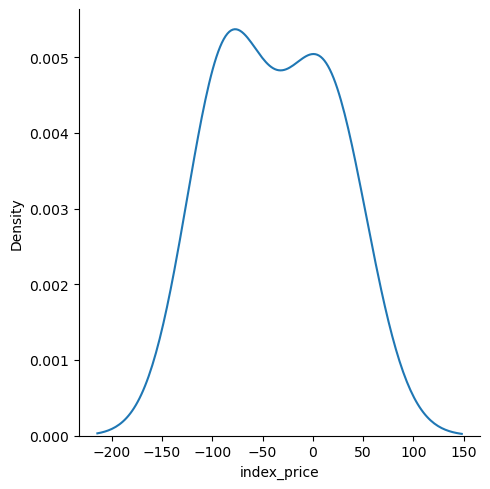

In [37]:
sns.displot(residuals,kind='kde')

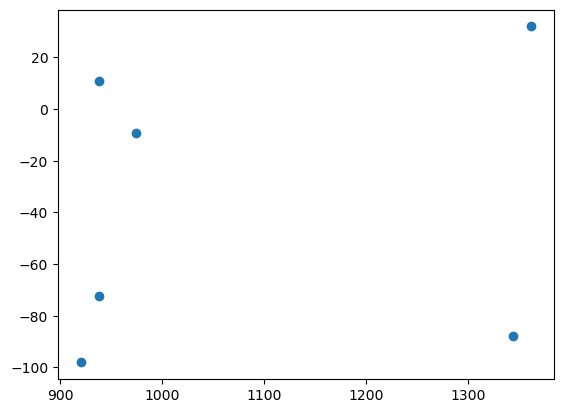

In [38]:
##scatterplot with respect to
plt.scatter(y_pred,residuals)

In [39]:
##OLS lINEAR REGRESSION
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [40]:
prediction=model.predict(X_test)
print(prediction)



[-105.12317227 -141.2886212  -141.2886212   264.49451793  282.57724239
 -159.37134566]


In [41]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2514
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                       0.781
Time:                        16:58:32   Log-Likelihood:                         -151.29
No. Observations:                  18   AIC:                                      306.6
Df Residuals:                      16   BIC:                                      308.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------